<a href="https://colab.research.google.com/github/enjileona/Bootcamp-Data-Science-and-Mechine-Learning/blob/main/Exercise_Simple_%26_Multiple_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE STUDY
Saya diberi dataset credit_score_regression.csv yang berisi informasi nasabah, termasuk umur, jumlah kredit, dll. Tugas saya adalah memanfaatkan model linear regression untuk memprediksi risk score dari nasabah tersebut.

#TASK
1. **Persiapan Notebook**
2. **Data Checking & EDA** (Exploratory Data Analysis)
3. **Data Preprocessing**
4. **Model Development**
5. **Model Evaluation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#1. DATASETS

In [ ]:
URL_DATA = 'https://drive.google.com/uc?id=1bN4gj2Xn0KolNzoattQU_FM3lj5ZjhMj'

df  = pd.read_csv(URL_DATA)

df.head()

,Unnamed: 0,INCOME,SAVINGS,DEBT,CREDIT_SCORE
0,0,33269,0,532304,444
1,1,77158,91187,315648,625
2,2,30917,21642,534864,469
3,3,80657,64526,629125,559
4,4,149971,1172498,2399531,473


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

#menghilangkan kolom tidak perlu

#2. Data Checking & EDA (Exploratory Data Analysis)

**- Cek Kualitas Data**

In [ ]:
# Check data info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   INCOME        1000 non-null   int64
 1   SAVINGS       1000 non-null   int64
 2   DEBT          1000 non-null   int64
 3   CREDIT_SCORE  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB
None


In [ ]:
# Check missing values
print(df.isnull().sum())

INCOME          0
SAVINGS         0
DEBT            0
CREDIT_SCORE    0
dtype: int64


**- Ringkasan Statistik**

In [ ]:
df.describe(include="all")

,INCOME,SAVINGS,DEBT,CREDIT_SCORE
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,121610.019000,4.131896e+05,7.907180e+05,586.712000
std,113716.699591,4.429160e+05,9.817904e+05,63.413882
min,0.000000,0.000000e+00,0.000000e+00,300.000000
25%,30450.250000,5.971975e+04,5.396675e+04,554.750000
50%,85090.000000,2.738505e+05,3.950955e+05,596.000000
75%,181217.500000,6.222600e+05,1.193230e+06,630.000000
max,662094.000000,2.911863e+06,5.968620e+06,800.000000


**- Univariate Analysis**

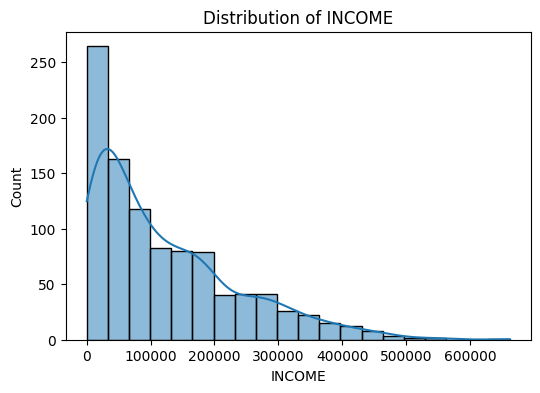

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df [ "INCOME"], kde=True, bins=20)
plt.title("Distribution of INCOME")
plt.show()

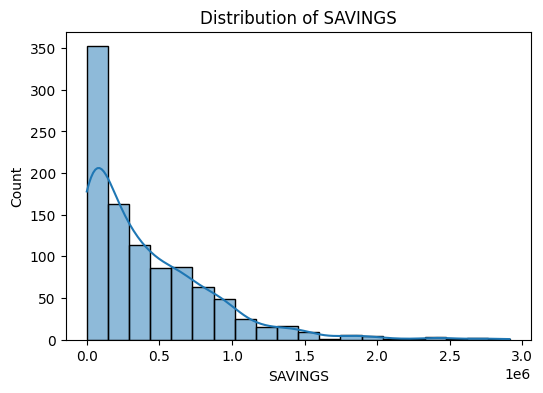

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df [ "SAVINGS"], kde=True, bins=20)
plt.title("Distribution of SAVINGS")
plt.show()

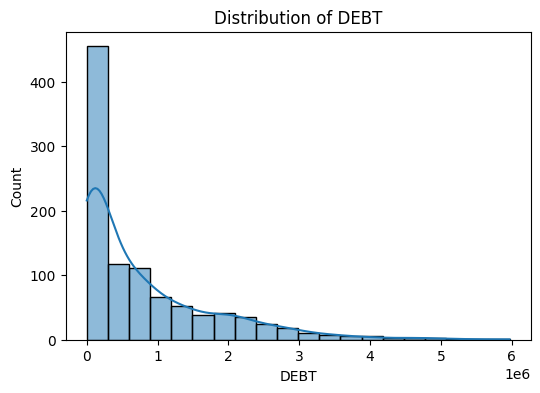

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df [ "DEBT"], kde=True, bins=20)
plt.title("Distribution of DEBT")
plt.show()

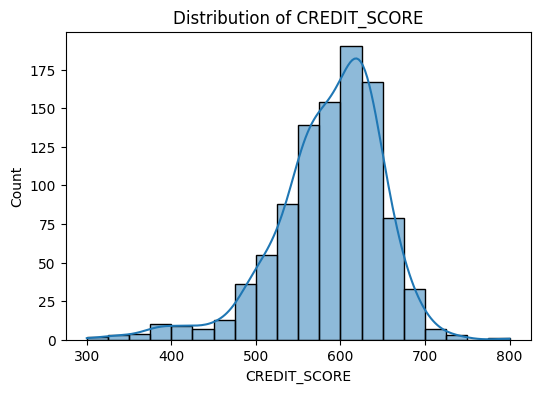

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df [ "CREDIT_SCORE"], kde=True, bins=20)
plt.title("Distribution of CREDIT_SCORE")
plt.show()

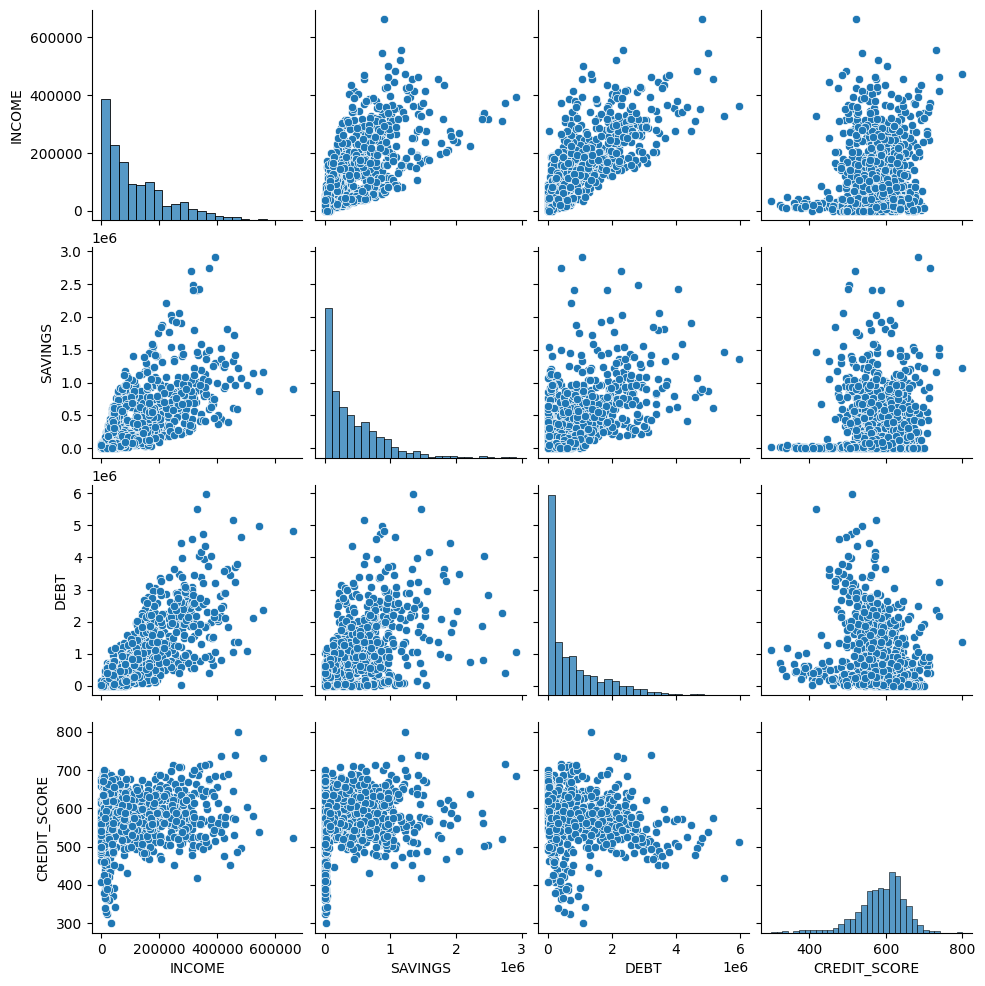

In [ ]:
sns.pairplot(df)
plt.show()

Insight: Dari scatterplot tersebut dapat dilihat bahwa terdapat korelasi positif antara income vs saving, income vs debt, dan saving vs debt. Sedangkan untuk credit_score tidak terlalu dipengaruhi satu variabel saja, melainkan kombinasi dari beberapa faktor. Hubungan yang sedikit muncul adalah debt tinggi cenderung credit_score lebih rendah, tapi korelasi lemah.


**●	Multivariate Analysis**

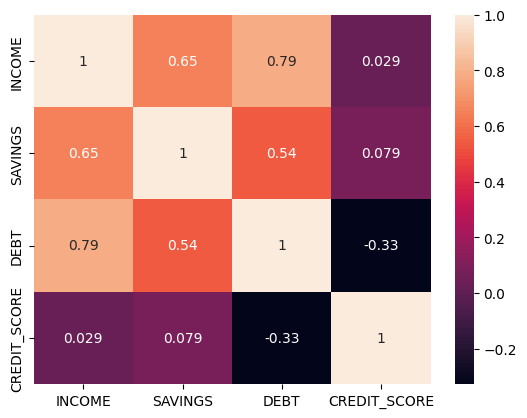

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

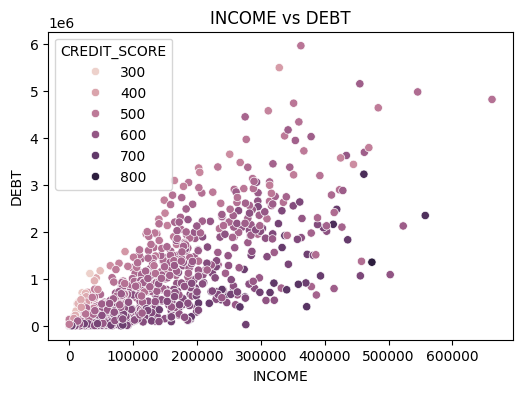

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="INCOME", y="DEBT", hue="CREDIT_SCORE", data=df)
plt.title("INCOME vs DEBT")
plt.show()

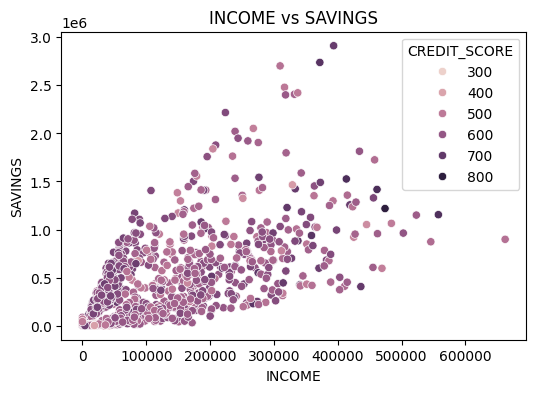

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="INCOME", y="SAVINGS", hue="CREDIT_SCORE", data=df)
plt.title("INCOME vs SAVINGS")
plt.show()

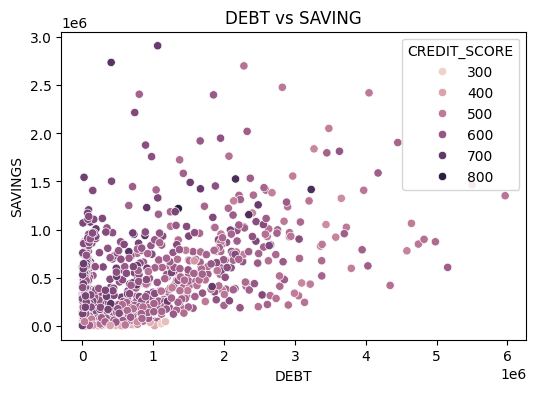

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="DEBT", y="SAVINGS", hue="CREDIT_SCORE", data=df)
plt.title("DEBT vs SAVING")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the features for VIF calculation
features = df[['INCOME', 'SAVINGS', 'DEBT']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                   for i in range(features.shape[1])]

print(vif_data)

   feature       VIF
0   INCOME  6.153808
1  SAVINGS  3.106705
2     DEBT  4.338478


credit_score cenderung menurun saat debt meningkat, sementara income dan savings tidak banyak berpengaruh langsung. Namun, income, savings, dan debt saling berkaitan kuat sebagai indikator kondisi finansial seseorang.

Perhitungan VIF
* Income: Tinggi – menunjukkan adanya multicollinearity kuat dengan variabel lain.
* Savings: Sedang – masih bisa diterima
* Debt: Cukup tinggi – menunjukkan korelasi kuat dengan INCOME dan SAVINGS.



# 3. Data Preprocessing

In [ ]:
df_ffillna = df.copy()

# Mengisi missing value pada beberapa kolom dengan nilai rata-rata masing-masing kolom
for culomn in ['INCOME', 'SAVINGS', 'DEBT', 'CREDIT_SCORE']:
    df_ffillna[culomn] = df_ffillna[culomn].fillna(df_ffillna[culomn].mean())

df_ffillna


,INCOME,SAVINGS,DEBT,CREDIT_SCORE
0,33269,0,532304,444
1,77158,91187,315648,625
2,30917,21642,534864,469
3,80657,64526,629125,559
4,149971,1172498,2399531,473
...,...,...,...,...
995,328892,1465066,5501471,418
996,81404,88805,680837,589
997,0,42428,30760,499
998,36011,8002,604181,507


# 4. Model Development

## SIMPLE LINEAR REGRESSION

In [ ]:
#menggunakan 1 variabel: Debt

X = df["DEBT"].values.reshape(-1, 1)
y = df["CREDIT_SCORE"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Modeling
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Intercept: ", lin_reg.intercept_)

print("Coefficient: ", lin_reg.coef_)

Intercept:  603.888244320965
Coefficient:  [-2.14104193e-05]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  mae_train = mean_absolute_error(y_train, y_train_pred)
  mse_train = mean_squared_error(y_train, y_train_pred)
  rmse_train = np.sqrt(mse_train)
  mape_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  r2_train = r2_score(y_train, y_train_pred)

  mae_test = mean_absolute_error(y_test, y_test_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  rmse_test = np.sqrt(mse_test)
  mape_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  r2_test = r2_score(y_test, y_test_pred)

  print("Training Set Evaluation:")
  print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
  print(f"Mean Squared Error (MSE): {mse_train:.2f}")
  print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
  print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%")
  print(f"R-squared (R^2): {r2_train:.2f}")

  print("\nTesting Set Evaluation:")
  print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
  print(f"Mean Squared Error (MSE): {mse_test:.2f}")
  print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
  print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
  print(f"R-squared (R^2): {r2_test:.2f}")

In [ ]:
evaluate_regression_model(lin_reg, X_train, y_train, X_test, y_test)

Training Set Evaluation:
Mean Absolute Error (MAE): 42.63
Mean Squared Error (MSE): 3615.83
Root Mean Squared Error (RMSE): 60.13
Mean Absolute Percentage Error (MAPE): 7.89%
R-squared (R^2): 0.10

Testing Set Evaluation:
Mean Absolute Error (MAE): 41.70
Mean Squared Error (MSE): 3472.97
Root Mean Squared Error (RMSE): 58.93
Mean Absolute Percentage Error (MAPE): 7.68%
R-squared (R^2): 0.13


## Multiple Linear Regression

In [ ]:
X = df[["DEBT", "SAVINGS"]]
y = df["CREDIT_SCORE"]

In [ ]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(X_train_multiple, y_train_multiple)

LinearRegression()

In [ ]:
print("Intercept: ", multiple_lin_reg.intercept_)

print("Coefficient: ", multiple_lin_reg.coef_)

Intercept:  592.2419828328897
Coefficient:  [-3.49608435e-05  5.36474205e-05]


Model Evaluation

In [ ]:
evaluate_regression_model(multiple_lin_reg, X_train_multiple, y_train_multiple, X_test_multiple, y_test_multiple)

Training Set Evaluation:
Mean Absolute Error (MAE): 40.42
Mean Squared Error (MSE): 3233.94
Root Mean Squared Error (RMSE): 56.87
Mean Absolute Percentage Error (MAPE): 7.47%
R-squared (R^2): 0.20

Testing Set Evaluation:
Mean Absolute Error (MAE): 40.79
Mean Squared Error (MSE): 3145.95
Root Mean Squared Error (RMSE): 56.09
Mean Absolute Percentage Error (MAPE): 7.48%
R-squared (R^2): 0.21


Model Multiple Linear Regression terbukti lebih unggul dibandingkan Simple Linear Regression, karena memiliki Nilai MAPE lebih kecil (lebih akurat) dan Nilai R² lebih besar (kemampuan menjelaskan data lebih tinggi). Dengan demikian, kombinasi variabel DEBT dan SAVINGS memberikan hasil prediksi skor kredit yang lebih baik dan lebih realistis dibandingkan hanya menggunakan DEBT saja.